<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Feature selection</h1>

## 1. Aims
<div class="alert alert-info">
To carry out feature selection on the leukaemia data.
</div>

## 2. Feature selection 
<div class="alert alert-info">
On the course webpage, you can download a (slightly reduced) version of the leukaemia data. It consists of some training data $X$ and associated labels $t$ as well as independent test data $X_{test}$ and $t_{test}$. Your task is to select some features and classify the data – in previous labs we have implemented code for classification and you may use whichever you like.
</div>

In [1]:
import numpy as np
import scipy.io
leuk = scipy.io.loadmat('labdata.mat')

In [48]:
X = leuk['X']
t = leuk['t']
X_test = leuk['X_test']
t_test = leuk['t_test']

<div class="alert alert-info">
Observe the class distribution of the data.
</div>

Text(0,0.5,'y-axis')

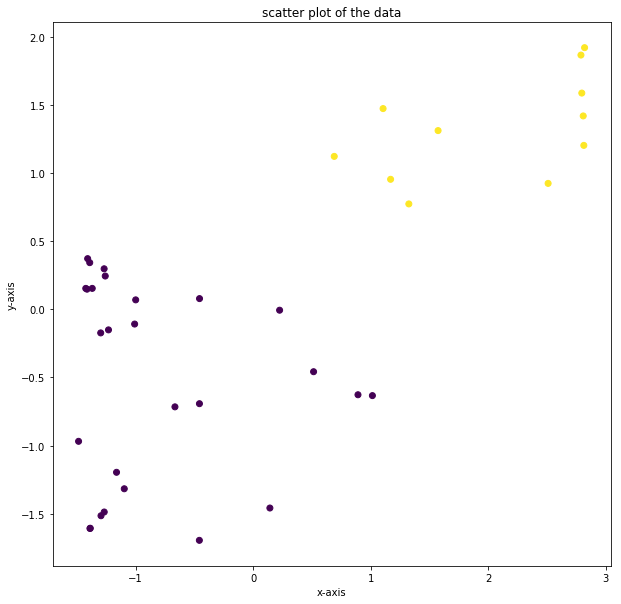

In [3]:
import scipy.io
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
colors = [int(i % 2) for i in t]
plt.scatter(X[:,0],X[:,1],c=colors)
plt.title("scatter plot of the data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")


### 2.1 Feature selection 
<div class="alert alert-info">
You are free to use any of the feature selection schemes we covered – scoring the features, PCA, or clustering them (you should already have $k$-means code to do this). In each case, you should use the test set to investigate how performance varies as you change the number of features.</div>

#### 2.1.1 Scoring 
<div class="alert alert-info">
Use the scoring mechanism described in the lectures (only on the training data) to obtain a set of features (corresponding to a subset of the original ones). You should make sure you extract this subset from the test data too!
</div>

In [4]:
def order_features_by_score(X,t):
    indexes_ones=np.where(t==1)
    
    indexes_zeros=np.where(t==0)
    
    var_zero=np.var(X[indexes_zeros[0]],axis=0)
    var_one=np.var(X[indexes_ones[0]],axis=0)
    mean_zero=np.mean(X[indexes_zeros[0]],axis=0)
    mean_one=np.mean(X[indexes_ones[0]],axis=0)
    scoring=np.absolute(mean_one-mean_zero)/(var_one+var_zero)
    order=np.flip(np.argsort(scoring),axis=0)
    
    
    return order,scoring

In [78]:
ordered_features, scores = order_features_by_score(X,t)


In [81]:
ordered_features, scores = order_features_by_score(X,t)



for i in range(10):
    print("Feature["+str(i)+"]: ",X[:,ordered_features[i]])
    

Feature[0]:  [ 0.31571753 -0.06869562  0.1666979   0.11495587  0.37963999 -0.00907479
 -0.12760999  0.07499754  0.30952618 -0.05461428  0.31735604  0.04720186
  0.05744771 -0.0936268   0.15524165  0.12973821  0.41617453 -0.07805135
  0.19196862  0.38884056 -0.08565813  0.34314369  0.13577865  0.17374334
 -0.01885071 -0.07558557 -0.02637961  0.14866506 -0.06088964 -0.21810487
 -0.28433491 -0.43743573 -0.23437026 -0.32373101 -0.28498162 -0.59138039
 -0.50109638 -0.29236329]
Feature[1]:  [-0.16656493  0.24390539 -0.05524798 -0.06753518 -0.14823066  0.04051182
 -0.27648078 -0.34598981  0.15690763 -0.18106733  0.31241782  0.16583351
  0.03371521 -0.10418982 -0.1887652  -0.57498615 -0.44584448 -0.15142887
 -0.33130541 -0.22252089  0.12489868  0.47363177  0.16763678 -0.07574007
 -0.33562774 -0.1751289  -0.45389641  0.17710453  0.26596071  0.21242805
  0.40825606  0.05349239  0.28858031  0.26637597  0.24864818  0.02832373
  0.29552945  0.33639258]
Feature[2]:  [-0.30151169 -0.35111201  0.33034

<div class="alert alert-info">
Plot the data by considering the top 2 features and comment on the results.
</div>

Text(0,0.5,'y-axis')

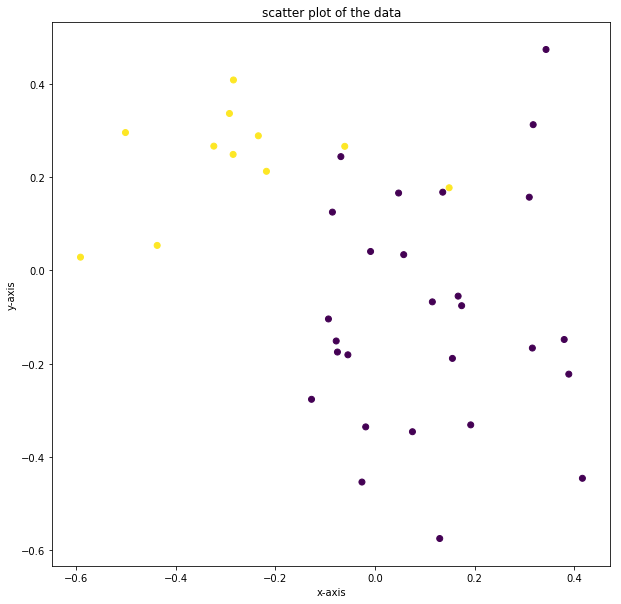

In [92]:
plt.figure(figsize=(10,10))
colors = [int(i % 2) for i in t]
plt.scatter(X[:,ordered_features[0]],X[:,ordered_features[1]],c=colors)
plt.title("scatter plot of the data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

Text(0,0.5,'y-axis')

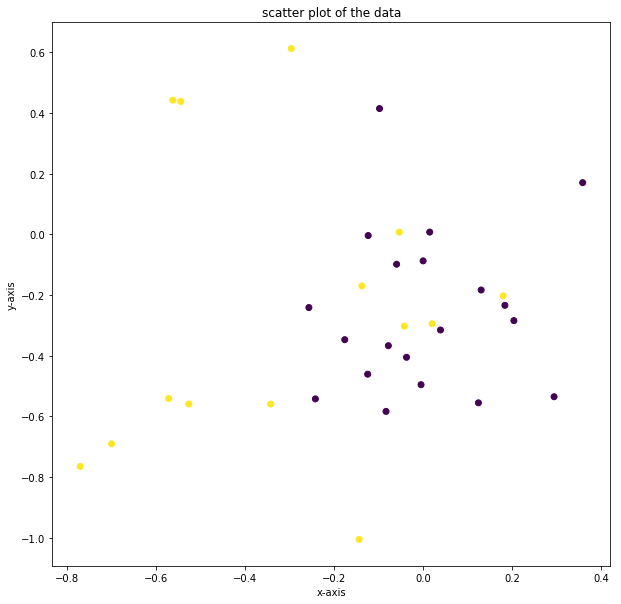

In [105]:
plt.figure(figsize=(10,10))
colors = [int(i % 2) for i in t_test]
plt.scatter(X_test[:,ordered_features[0]],X_test[:,ordered_features[1]],c=colors)
plt.title("scatter plot of the data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

<div class="alert alert-info">There is few overlap between the 2 classes when considering the top 2 features in the training while in the test set the 2 classes are more hugely nonseperable.</div>

<div class="alert alert-info">
Does the visualisation of separate classes improve if you consider the top 3 features instead?</div>

Text(0.5,0,'3rd feature')

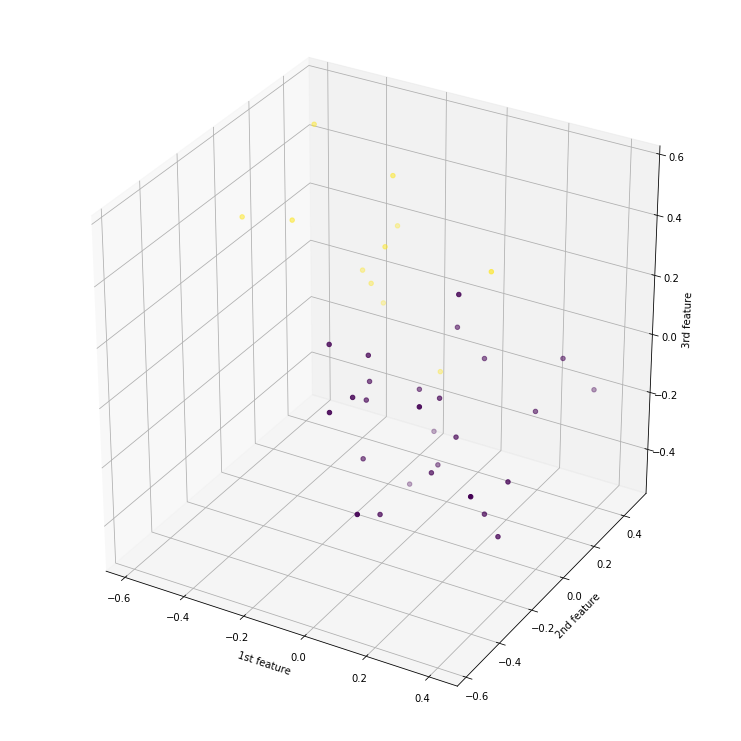

In [103]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
colors = [int(i % 2) for i in t]
ax.scatter(X[:,ordered_features[0]],X[:,ordered_features[1]],X[:,ordered_features[2]],c=colors)
ax.set_xlabel('1st feature')
ax.set_ylabel('2nd feature')
ax.set_zlabel('3rd feature')

Text(0.5,0,'3rd feature')

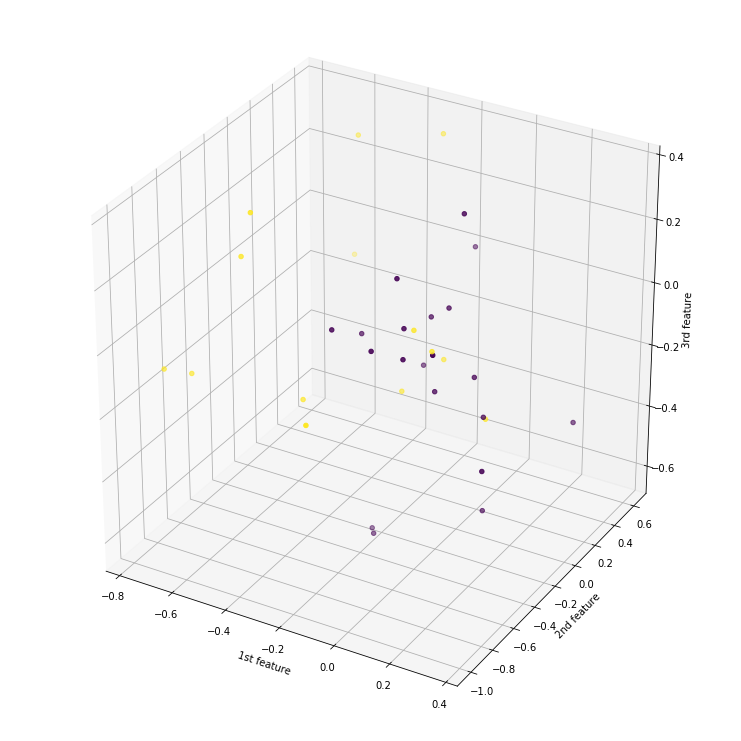

In [107]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
colors = [int(i % 2) for i in t_test]
ax.scatter(X_test[:,ordered_features[0]],X_test[:,ordered_features[1]],X_test[:,ordered_features[2]],c=colors)
ax.set_xlabel('1st feature')
ax.set_ylabel('2nd feature')
ax.set_zlabel('3rd feature')

<div class="alert alert-info">The classes look now less seperate than before but still visibly seperate.</div>

#### 2.1.2 Clustering
<div class="alert alert-info">

You can use the $k$-means code you implemented in the previous notebook. Remember to pass the data the correct way around and only cluster the training data. Transforming the test data is a little more complex – your $k$-means should give you assignments of features to clusters. Use these alongside the test data to compute the cluster means for the test data (you do not need to re-assign the clusterings).

</div>

In [250]:
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

class Kmeans:
    
    def __init__(self):
        pass
    
    def initialize_centroids(self,k,d):
        self.means=np.random.rand(k,d)
        
    def assign_closest(self):
        self.assignments=np.zeros((self.data.shape[0],self.means.shape[0]))
        self.distances=np.zeros((self.data.shape[0],self.means.shape[0]))
        for i in range(self.data.shape[0]):

            dist=np.linalg.norm(self.means - self.data[i],axis=1)
            self.distances[i]=dist
        indexes=[np.argmin(t) for t in self.distances]    
        for i in range(self.assignments.shape[0]):
            self.assignments[i,indexes[i]]=1
        
    def update_means(self):
        self.previous_means=self.means
        for i in range(self.means.shape[0]):
            self.means[i]=np.divide(np.sum(self.data[np.where(self.assignments[:,i]==1)],axis=0),np.sum(self.assignments[:,i]))
        
    def nochange(self):
        return np.array_equal(self.means,self.previous_means)
    
    def kmeans(self,data, k=2, centroids=None):
        self.data=data
        if(centroids==None):
            self.initialize_centroids(k,self.data.shape[1])
        else:
            self.means=centroids
        self.assign_closest()
        self.update_means()
        steps=0
        while(not self.nochange() ):  
            self.update_means()
            self.assign_closest()
            steps+=1
            
    def  plot_results(self):
        colors = itertools.cycle(["r", "b", "g"])
        
        plt.figure(figsize=(15,8))
        for i in range(self.means.shape[0]):

            x=self.data[np.where(self.assignments[:,i]==1)][:,0]
            y=self.data[np.where(self.assignments[:,i]==1)][:,1]
            c=next(colors)
            plt.scatter(self.means[i][0],self.means[i][1],color=c,marker="v")
            plt.scatter(x,y,color=c)
        plt.title('Clustering', fontsize=20)
        plt.ylabel('y-axis', fontsize=15)
        plt.xlabel('x-axis', fontsize=15)
        plt.grid()
        plt.show()
    
    def get_clusters(self):
        return self.means.T 
    
    def cluster_test_set(self,x):
        x=x.T
        self.test_means=np.zeros((self.means.shape[0],x.shape[1]))
        for i in range(self.test_means.shape[0]):
            self.test_means[i]=np.divide(np.sum(x[np.where(self.assignments[:,i]==1)],axis=0),np.sum(self.assignments[:,i]))
        return self.test_means.T,self.assignments    

#### Clustering on 2 kmeans

In [251]:
cluster=Kmeans()
cluster.kmeans(X.T,k=2)
means_train=cluster.get_clusters()
means_test,cluster_assigments=cluster.cluster_test_set(X_test)

##### Visulizing Seperation on training set

Text(0,0.5,'y-axis')

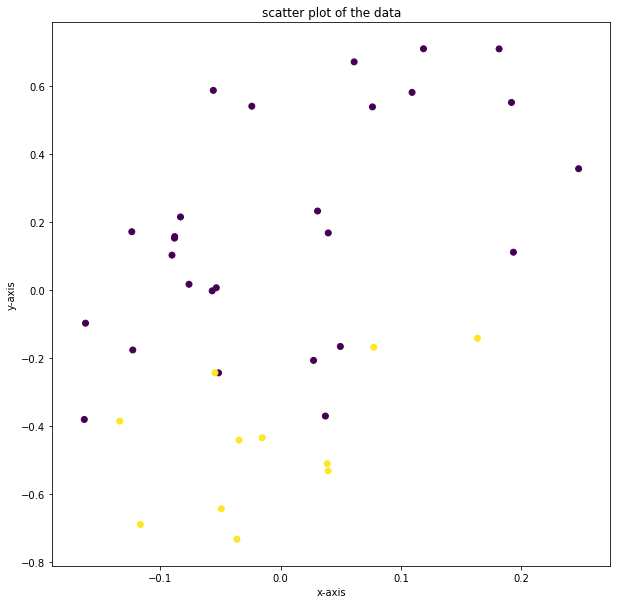

In [253]:
plt.figure(figsize=(10,10))
colors = [int(i % 2) for i in t]
plt.scatter(means_train[:,0],means_train[:,1],c=colors)
plt.title("scatter plot of the data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

##### Visulizing Seperation on test set

Text(0,0.5,'y-axis')

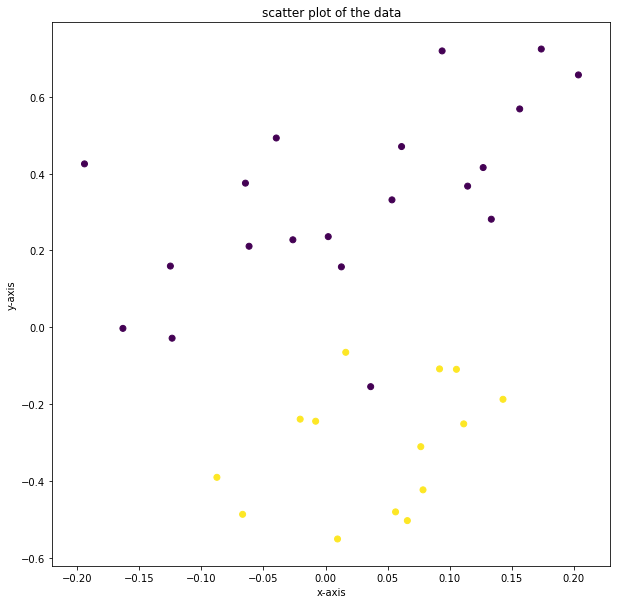

In [254]:
plt.figure(figsize=(10,10))
colors = [int(i % 2) for i in t_test]
plt.scatter(means_test[:,0],means_test[:,1],c=colors)
plt.title("scatter plot of the data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

#### Clustering on 3 kmeans

In [255]:
cluster=Kmeans()
cluster.kmeans(X.T,k=3)
means_train=cluster.get_clusters()
means_test,cluster_assigments=cluster.cluster_test_set(X_test)

##### Visulizing Seperation on training set

Text(0.5,0,'3rd feature')

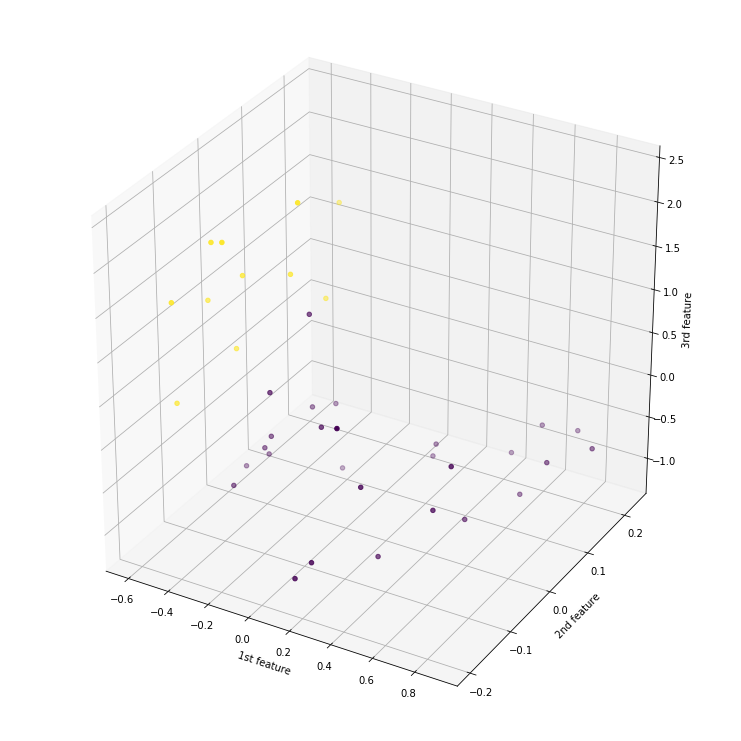

In [259]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
colors = [int(i % 2) for i in t]
ax.scatter(means_train[:,0],means_train[:,1],means_train[:,2],c=colors)
ax.set_xlabel('1st feature')
ax.set_ylabel('2nd feature')
ax.set_zlabel('3rd feature')

##### Visulizing Seperation on test set

Text(0.5,0,'3rd feature')

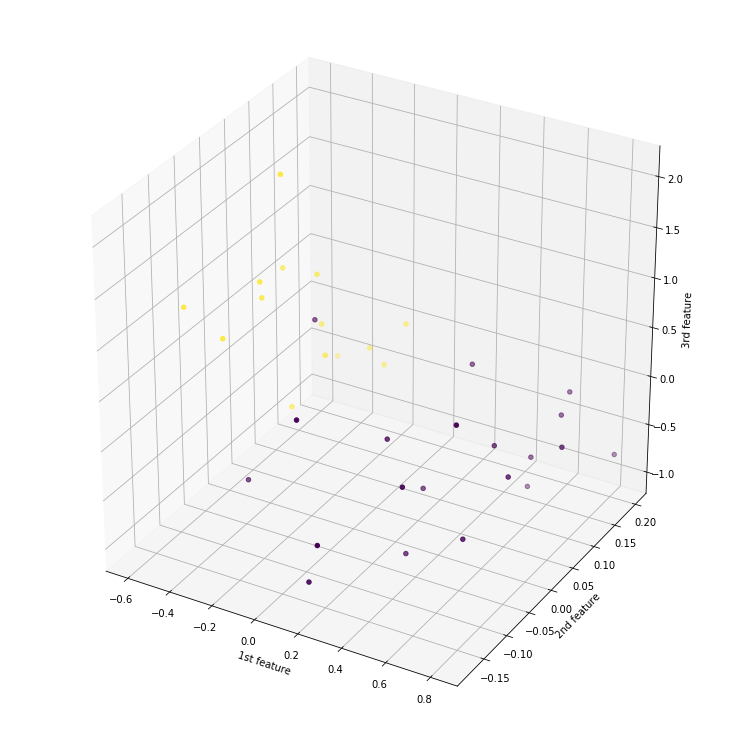

In [260]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
colors = [int(i % 2) for i in t_test]
ax.scatter(means_test[:,0],means_test[:,1],means_test[:,2],c=colors)
ax.set_xlabel('1st feature')
ax.set_ylabel('2nd feature')
ax.set_zlabel('3rd feature')

<div class="alert alert-info">In the kmeans we can see that we achieved a better seperation than 1st method.</div>

#### 2.1.3 Principal components
<div class="alert alert-info">
Implement a function for obtaining the $k$ principal components of your data.
Try to avoid using 'sklearn' libraries for this task!
</div>

In [293]:
def pca_k(X, k):
    covariance=np.cov(X.T)
    eigenvalues,eigenvectors=np.linalg.eig(covariance)
    ordered_indexes=np.flip(np.argsort(eigenvalues),axis=0)
    transformation=eigenvectors[:,ordered_indexes[:k]]
    projected_feature=np.dot(X,transformation)
    
    return np.real(projected_feature)
    

<div class="alert alert-info">
As before, compare and contrast the effectiveness of using PCA when considering 2 and 3 principal components, respectively.<br>
Plot your results using scatter plots and comment on what you observe.
</div>

In [294]:
Z=pca_k(X,2)

Text(0,0.5,'y-axis')

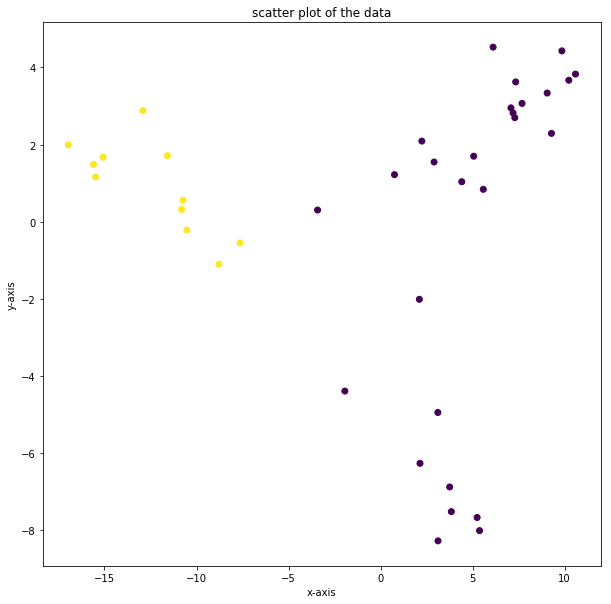

In [296]:
import scipy.io
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
colors = [int(i % 2) for i in t]
plt.scatter(Z[:,0],Z[:,1],c=colors)
plt.title("scatter plot of the data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

Text(0.5,0,'3rd feature')

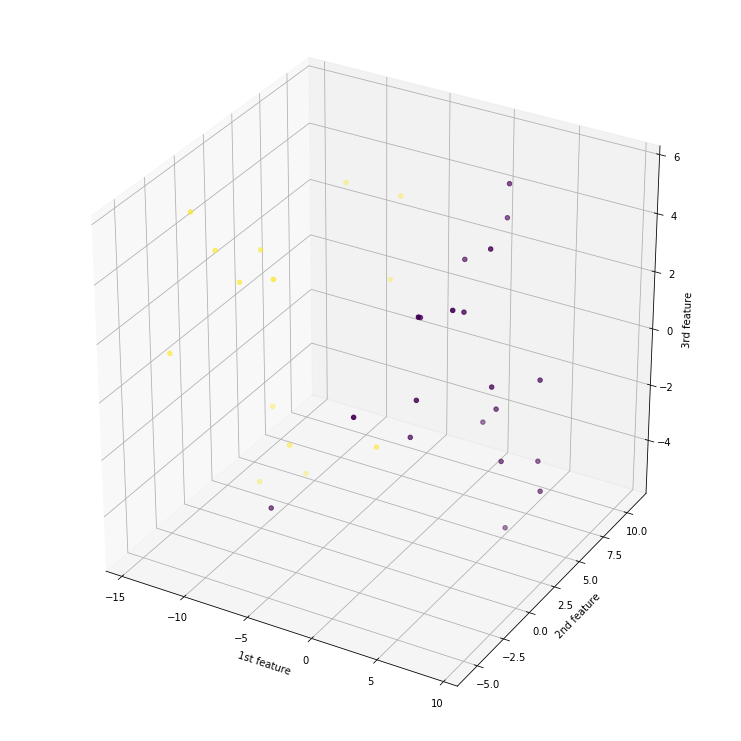

In [299]:
Z=pca_k(X_test,3)
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
colors = [int(i % 2) for i in t_test]
ax.scatter(Z[:,0],Z[:,1],Z[:,2],c=colors)
ax.set_xlabel('1st feature')
ax.set_ylabel('2nd feature')
ax.set_zlabel('3rd feature')

## 3. Classification
<div class="alert alert-info">
Insofar, we have only considered how carrying out dimensionality reduction allows us to _visually_ distinguish the different classes of the dataset.<br><br>

Using any of the classification algorithms we developed in the previous lectures, assess how classification performance varies when carrying out any of the above feature selection techniques as a preprocessing step. </div>

### Without any preprocessing

0.9705882352941176


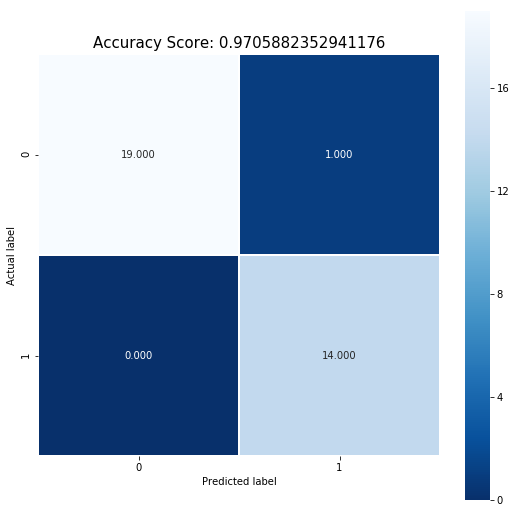

In [358]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

logisticRegr = LogisticRegression()
logisticRegr.fit(X, t.reshape((t.shape[0],)))
predictions =logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, t_test.reshape((t_test.shape[0],)))
print(score)
cm = metrics.confusion_matrix(t_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);



As we can see we got a decent accuracy without any feature selection let's with only one missclassication. Now let's see if we can get a 100 percent accuracy with feature selection methods.

### Scoring

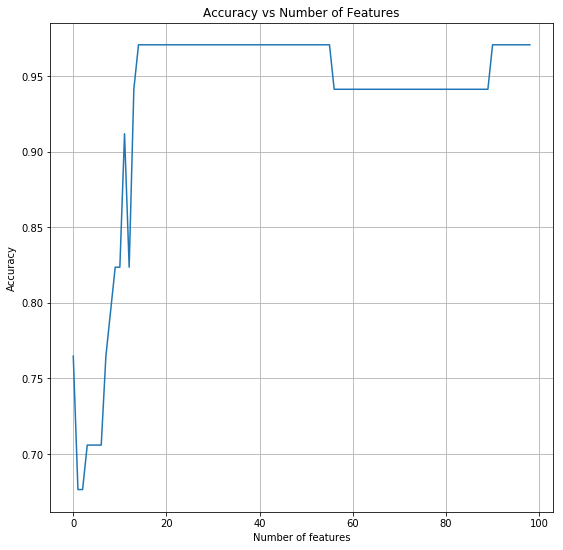

In [359]:
ordered_features, scores = order_features_by_score(X,t)
logisticRegr = LogisticRegression()
number_features=np.arange(1,100)
scores=[]
for number in number_features:
    logisticRegr.fit(X[:,ordered_features[:number]], t.reshape((t.shape[0],)))
    predictions =logisticRegr.predict(X_test[:,ordered_features[:number]])
    score = logisticRegr.score(X_test[:,ordered_features[:number]], t_test.reshape((t_test.shape[0],)))
    scores.append(score)
plt.figure(figsize=(9,9))
plt.ylabel('Accuracy');
plt.xlabel('Number of features')
plt.title('Accuracy vs Number of Features')
plt.plot(scores)
plt.grid()
plt.show()
 

In the first case of feature selecction it seems that removing the features makes the performance much worse.

Now we will try clustering method.

### Clustering

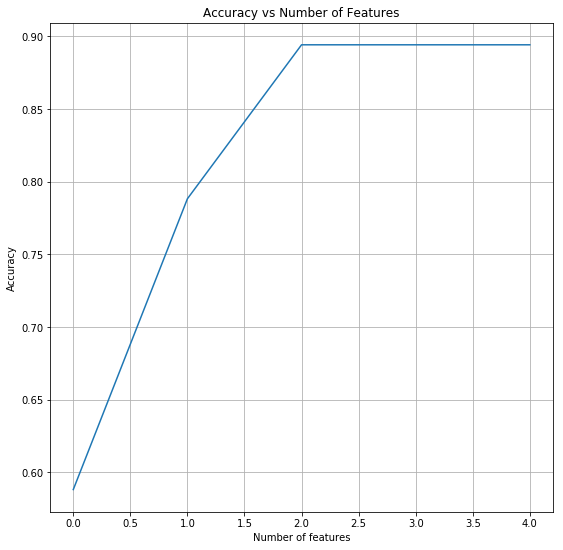

0.8941176470588236

In [367]:
number_features=np.arange(1,6)


scores=[]
score_temp=np.zeros((5,1))
for number in number_features:
    for i in range(5):
        cluster=Kmeans()
        cluster.kmeans(X.T,k=number)
        means_train=cluster.get_clusters()
        means_test,cluster_assigments=cluster.cluster_test_set(X_test)
        logisticRegr = LogisticRegression()
        logisticRegr.fit(means_train, t.reshape((t.shape[0],)))
        score = logisticRegr.score(means_test, t_test.reshape((t_test.shape[0],)))
        score_temp[i]=score
    scores.append(np.mean(score_temp))
plt.figure(figsize=(9,9))
plt.ylabel('Accuracy');
plt.xlabel('Number of features')
plt.title('Accuracy vs Number of Features')
plt.plot(scores)
plt.grid()
plt.show()
np.max(scores)

Here also no improvement in score.

### Using PCA

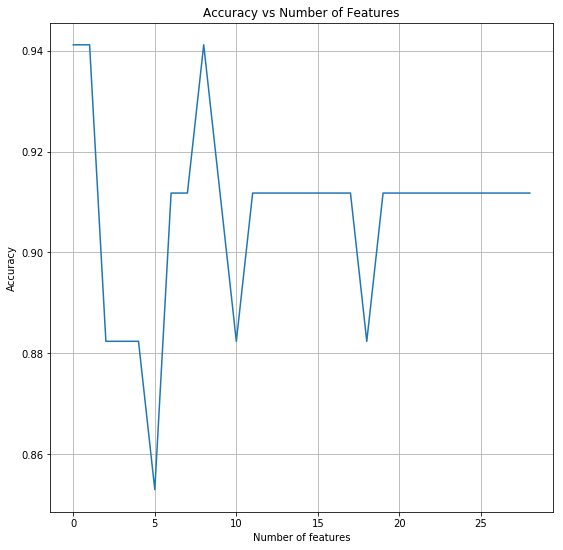

0.9411764705882353

In [368]:
number_features=np.arange(1,30)


scores=[]
score_temp=np.zeros((5,1))
for number in number_features:
    for i in range(5):
        Z_train=pca_k(X,number)
        Z_test=pca_k(X_test,number)
        logisticRegr = LogisticRegression()
        logisticRegr.fit(Z_train, t.reshape((t.shape[0],)))
        score = logisticRegr.score(Z_test, t_test.reshape((t_test.shape[0],)))
        score_temp[i]=score
    scores.append(np.mean(score_temp))
plt.figure(figsize=(9,9))
plt.ylabel('Accuracy');
plt.xlabel('Number of features')
plt.title('Accuracy vs Number of Features')
plt.plot(scores)
plt.grid()
plt.show()
np.max(scores)

### Clustering

In [16]:
def cluster_test_set(x,labels,k):
    x=x.T
    test_means=np.zeros((k,x.shape[1]))
    for i in range(k):
        test_means[i]=np.divide(np.sum(x[np.where(labels[:]==i)],axis=0),np.sum(labels[labels==i].size))
    return test_means.T 

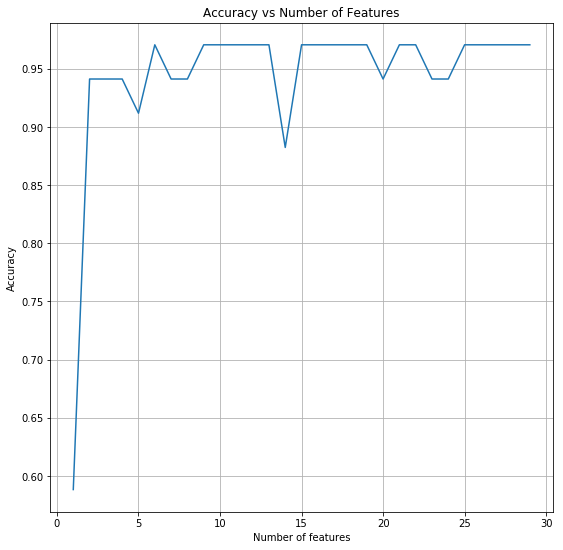

0.9705882352941175

In [68]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
import numpy as np



number_features=np.arange(1,30)


scores=[]
score_temp=np.zeros((10,1))
for number in number_features:
    for i in range(10):
        kmeans = KMeans(n_clusters=number, random_state=0)
        means_train=kmeans.fit_transform(X)
        means_test=cluster_test_set(X_test,kmeans.labels_,number)
        logisticRegr = LogisticRegression()
        logisticRegr.fit(means_train, t.reshape((t.shape[0],)))
        score = logisticRegr.score(means_test, t_test.reshape((t_test.shape[0],)))
        score_temp[i]=score
    scores.append(np.mean(score_temp))
plt.figure(figsize=(9,9))
plt.ylabel('Accuracy');
plt.xlabel('Number of features')
plt.title('Accuracy vs Number of Features')
plt.plot(np.arange(1,len(scores)+1),scores)
plt.grid()
plt.show()
np.max(scores)